In [1]:
import uproot
import hist
from hist import Hist
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mplhep
import numpy as np
import os

In [2]:
def plot_distribution(channel='jpsidzero', parameter='invariant_mass', energy='13'):

    plt.style.use(mplhep.style.CMS)
    try:
        file_path = f"control_plots_{channel}_{energy}TeV.root"
        tree = uproot.open(file_path)["GenTree"]
    except:
        print("Check if the root file is available. Channel must be: jpsidzero, jpsidplus or jpsidsplus. Energy must be: 13 or 13p6")

    # Extract the variable from the tree
    if channel == 'jpsidzero':
        gen_par = tree[f"genJpsidzero_{parameter}"].array(library="np")
    elif channel == 'jpsidplus':
        gen_par = tree[f"genJpsidplus_{parameter}"].array(library="np")
    elif channel == 'jpsidsplus':
        gen_par = tree[f"genJpsidsplus_{parameter}"].array(library="np")
    
    gen_par_flat = np.concatenate([arr for arr in gen_par if len(arr) > 0])
    
    # Plot with mplhep and matplotlib
    fig, ax = plt.subplots(figsize=(9, 7))
    
    if energy == '13p6': 
        energy = '13.6'

    if parameter == 'invariant_mass':
        xlab = r"$M_{J/\psi Dmeson} [GeV/c^2]$"
        # Create histogram with hist
        hist_ = hist.Hist.new.Reg(20, 0, 100, name="mass").Double()
        hist_.fill(mass=gen_par_flat)
    elif parameter == 'delta_rapidity':
        xlab = r"$\Delta y_{J/\psi Dmeson}$"
        # Create histogram with hist
        hist_ = hist.Hist.new.Reg(20, 0, 4, name="deltarap").Double()
        hist_.fill(deltarap=gen_par_flat)
    elif parameter == 'delta_phi':
        xlab = r"$\Delta \phi_{J/\psi Dmeson} [rad]$"
        # Create histogram with hist
        hist_ = hist.Hist.new.Reg(20, 0, 4, name="deltaphi").Double()
        hist_.fill(deltaphi=gen_par_flat)

    if channel == 'jpsidzero':
        plt.xlabel(xlab.replace("meson", '^0'))
    elif channel == 'jpsidplus':
        plt.xlabel(xlab.replace("meson", '^+'))
    elif channel == 'jpsidsplus':
        plt.xlabel(xlab.replace("meson", '^+_s'))

    mplhep.histplot(hist_, histtype="fill", label=f"{energy} TeV", ax=ax)
        
    plt.ylabel("Counts")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    os.makedirs('single_plots', exist_ok=True)
    plt.savefig(os.path.join('single_plots', f'{channel}_{parameter}_{energy}TeV.png'))
    print("Saved: "  + os.path.join('single_plots', f'{channel}_{parameter}_{energy}TeV.png'))
    plt.show()

## Individual plots

Saved: single_plots/jpsidzero_invariant_mass_13TeV.png


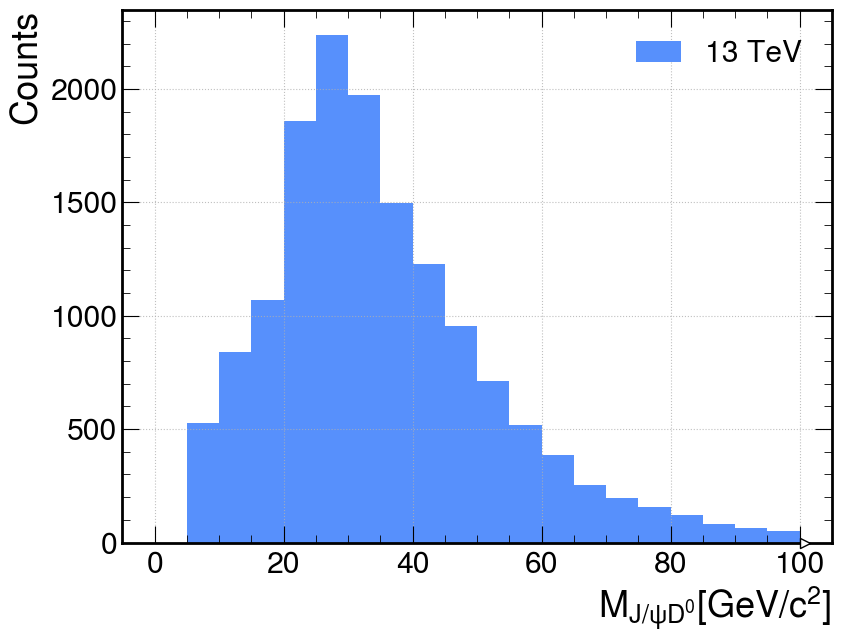

Saved: single_plots/jpsidzero_invariant_mass_13.6TeV.png


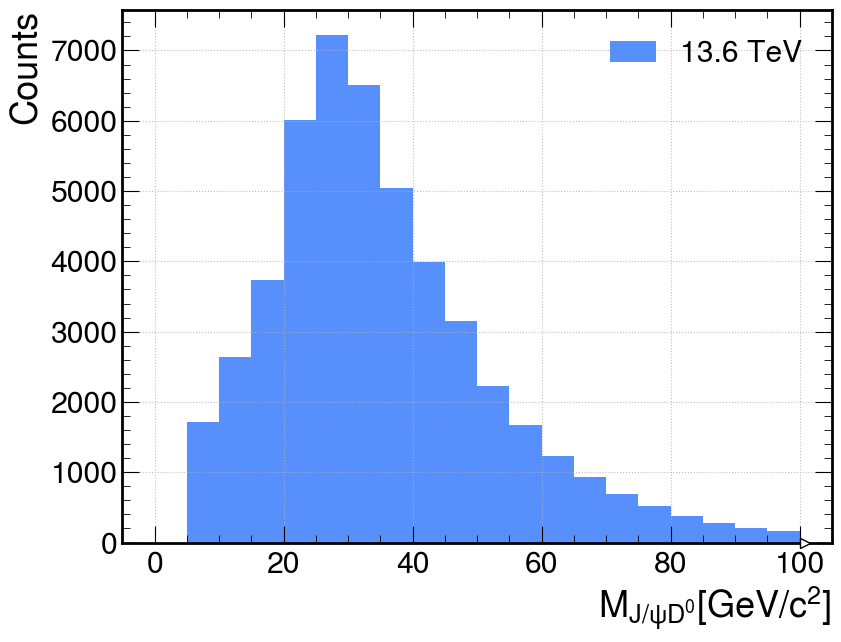

Saved: single_plots/jpsidzero_delta_rapidity_13TeV.png


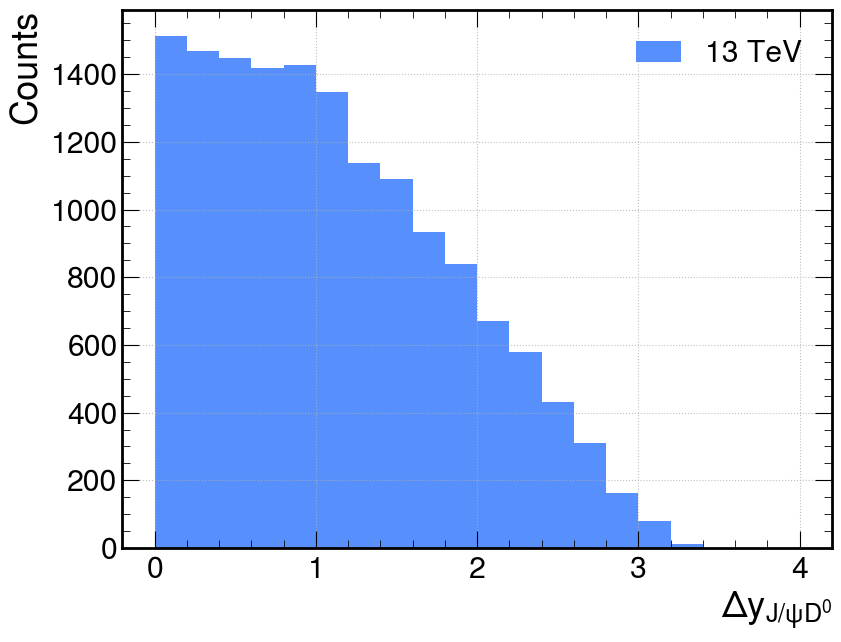

Saved: single_plots/jpsidzero_delta_rapidity_13.6TeV.png


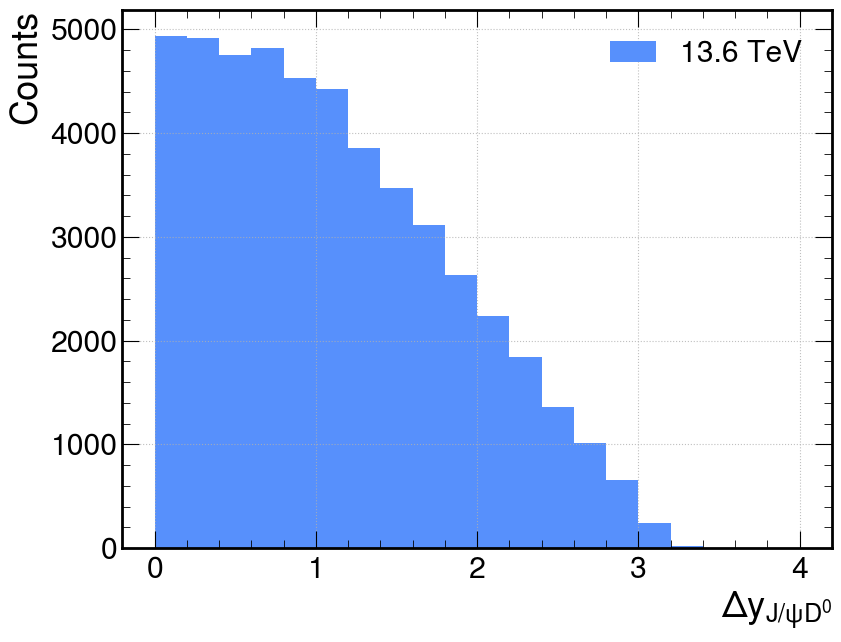

Saved: single_plots/jpsidzero_delta_phi_13TeV.png


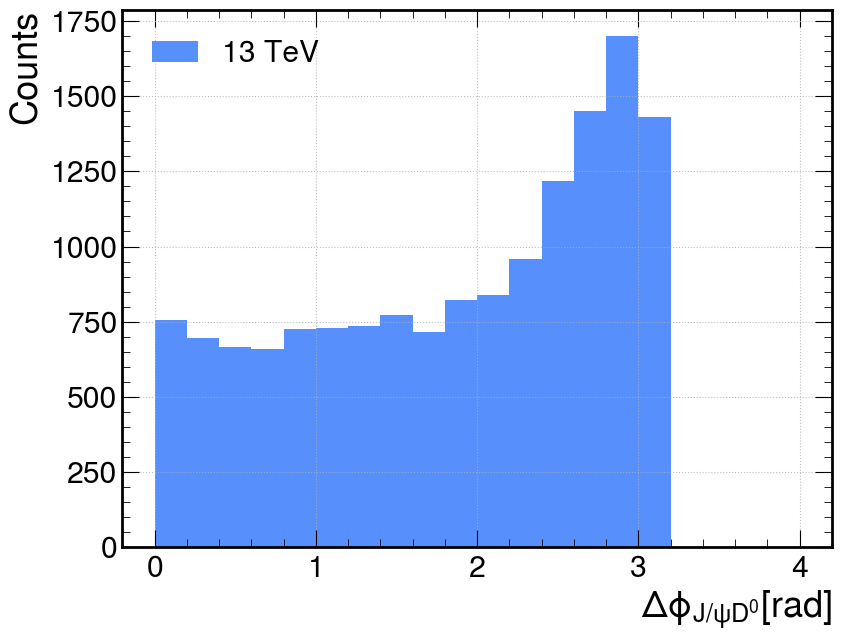

Saved: single_plots/jpsidzero_delta_phi_13.6TeV.png


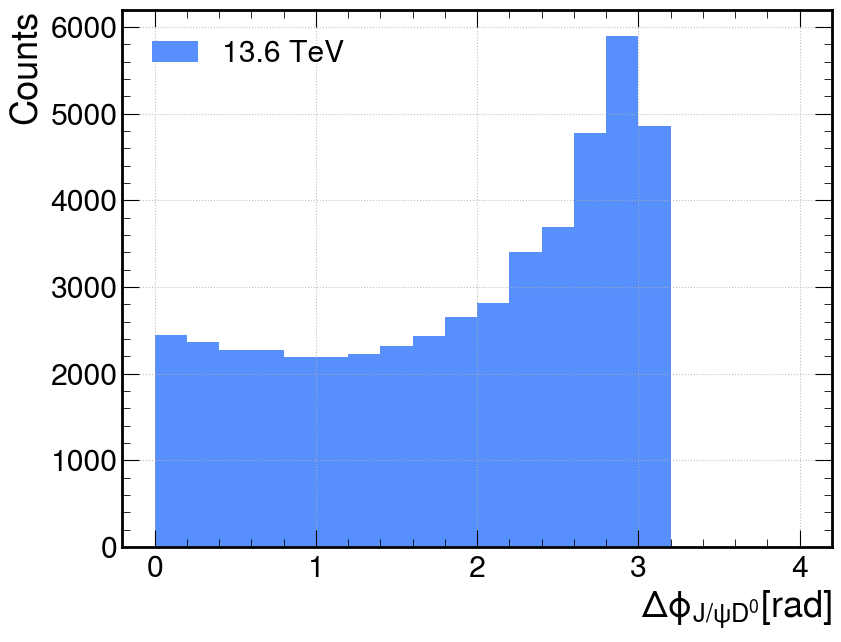

In [3]:
# JpsiDzero

plot_distribution(channel='jpsidzero', parameter='invariant_mass', energy='13')
plot_distribution(channel='jpsidzero', parameter='invariant_mass', energy='13p6')

plot_distribution(channel='jpsidzero', parameter='delta_rapidity', energy='13')
plot_distribution(channel='jpsidzero', parameter='delta_rapidity', energy='13p6')

plot_distribution(channel='jpsidzero', parameter='delta_phi', energy='13')
plot_distribution(channel='jpsidzero', parameter='delta_phi', energy='13p6')

Saved: single_plots/jpsidplus_invariant_mass_13TeV.png


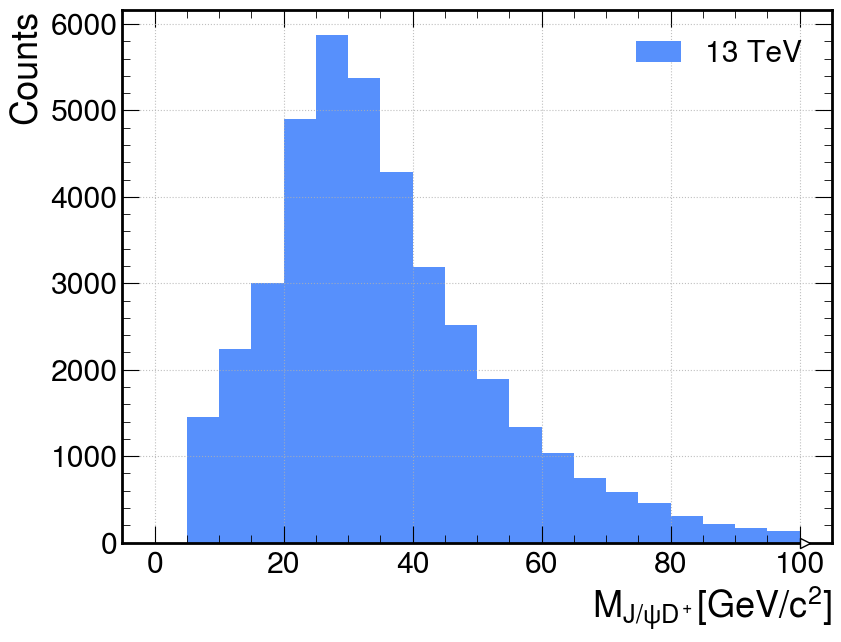

Saved: single_plots/jpsidplus_invariant_mass_13.6TeV.png


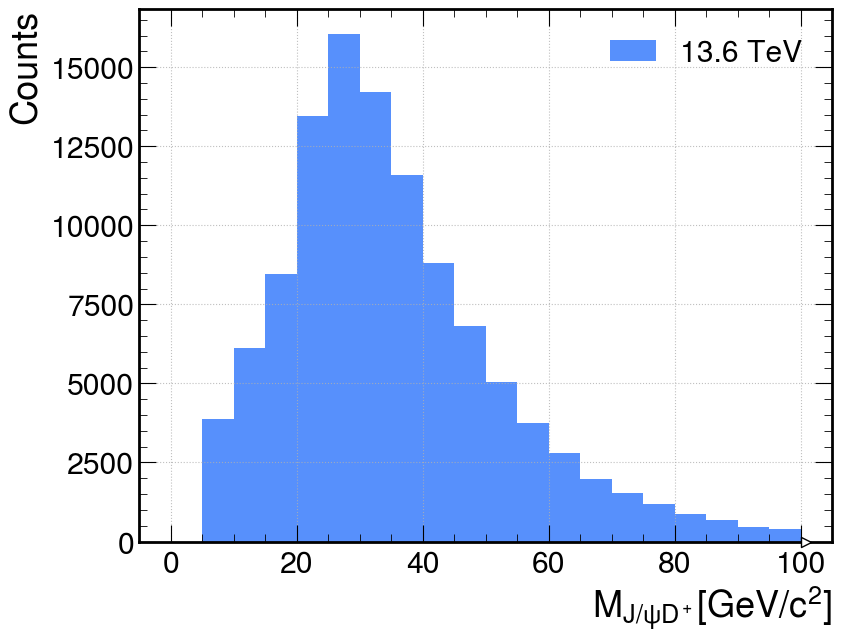

Saved: single_plots/jpsidplus_delta_rapidity_13TeV.png


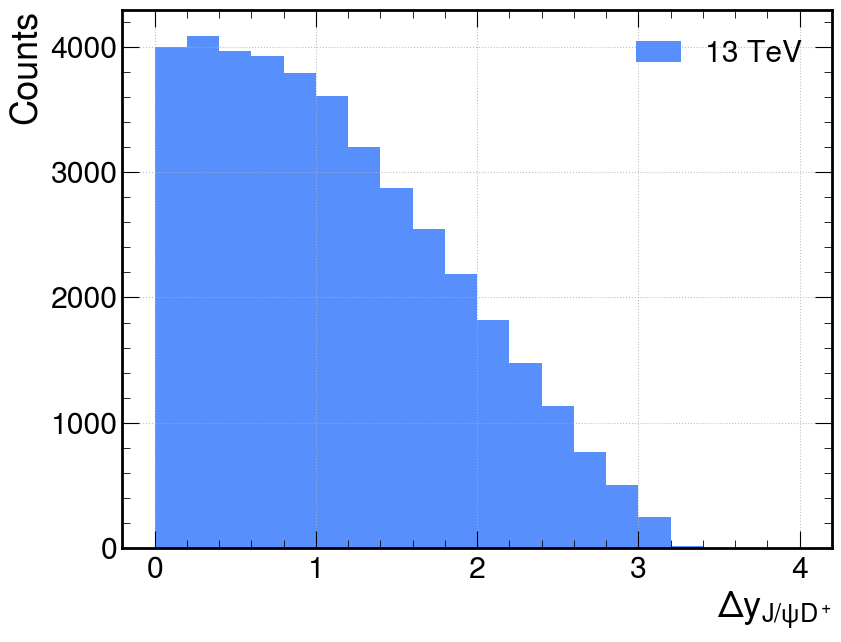

Saved: single_plots/jpsidplus_delta_rapidity_13.6TeV.png


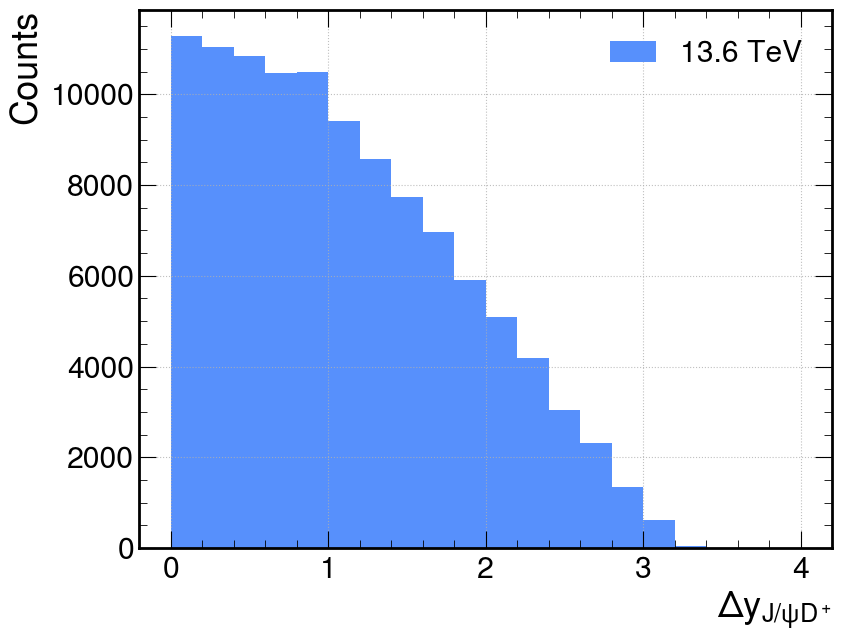

Saved: single_plots/jpsidplus_delta_phi_13TeV.png


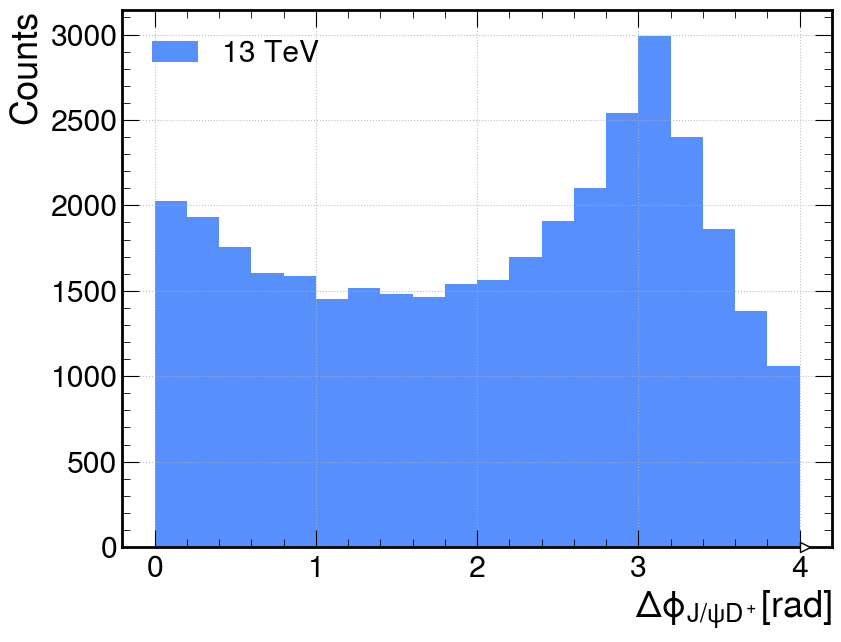

Saved: single_plots/jpsidplus_delta_phi_13.6TeV.png


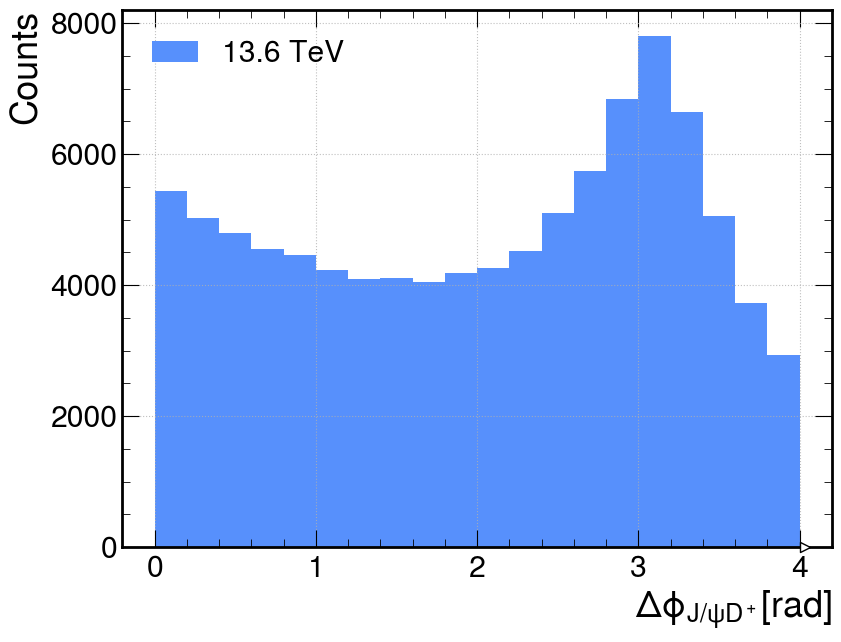

In [4]:
# JpsiDplus

plot_distribution(channel='jpsidplus', parameter='invariant_mass', energy='13')
plot_distribution(channel='jpsidplus', parameter='invariant_mass', energy='13p6')

plot_distribution(channel='jpsidplus', parameter='delta_rapidity', energy='13')
plot_distribution(channel='jpsidplus', parameter='delta_rapidity', energy='13p6')

plot_distribution(channel='jpsidplus', parameter='delta_phi', energy='13')
plot_distribution(channel='jpsidplus', parameter='delta_phi', energy='13p6')

Saved: single_plots/jpsidsplus_invariant_mass_13TeV.png


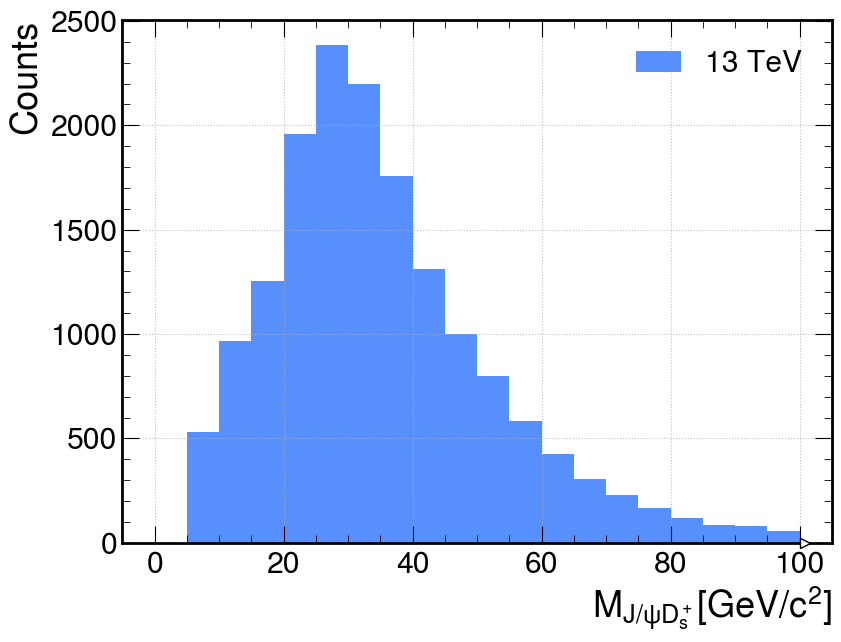

Saved: single_plots/jpsidsplus_invariant_mass_13.6TeV.png


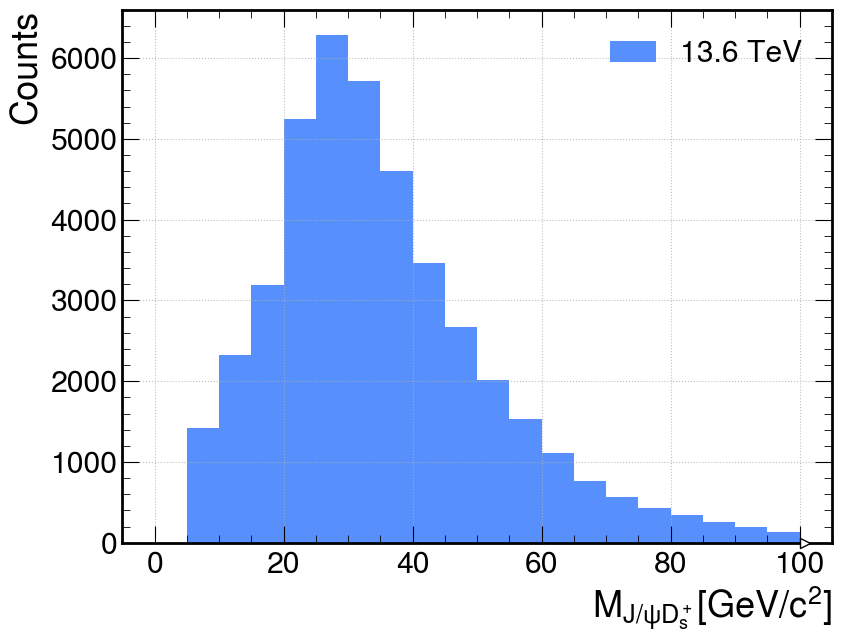

Saved: single_plots/jpsidsplus_delta_rapidity_13TeV.png


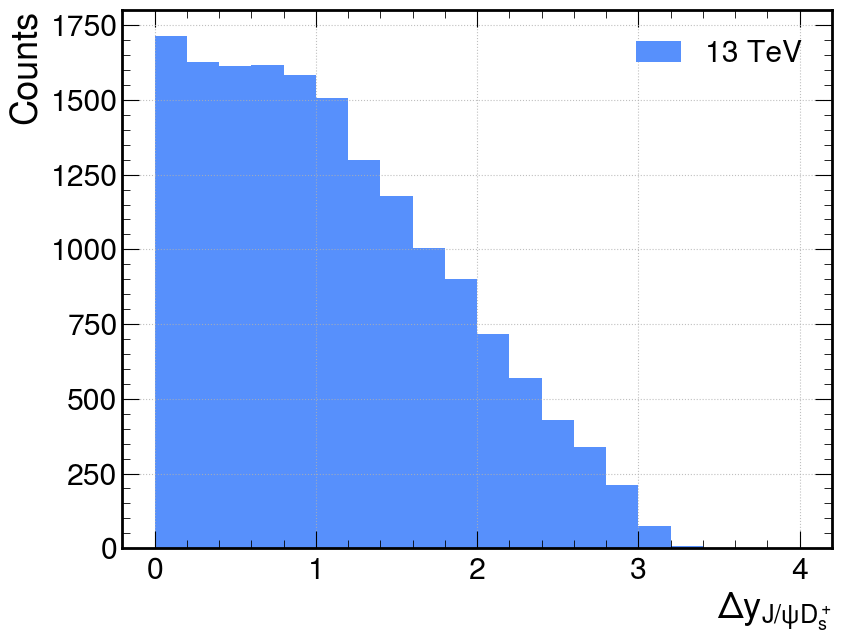

Saved: single_plots/jpsidsplus_delta_rapidity_13.6TeV.png


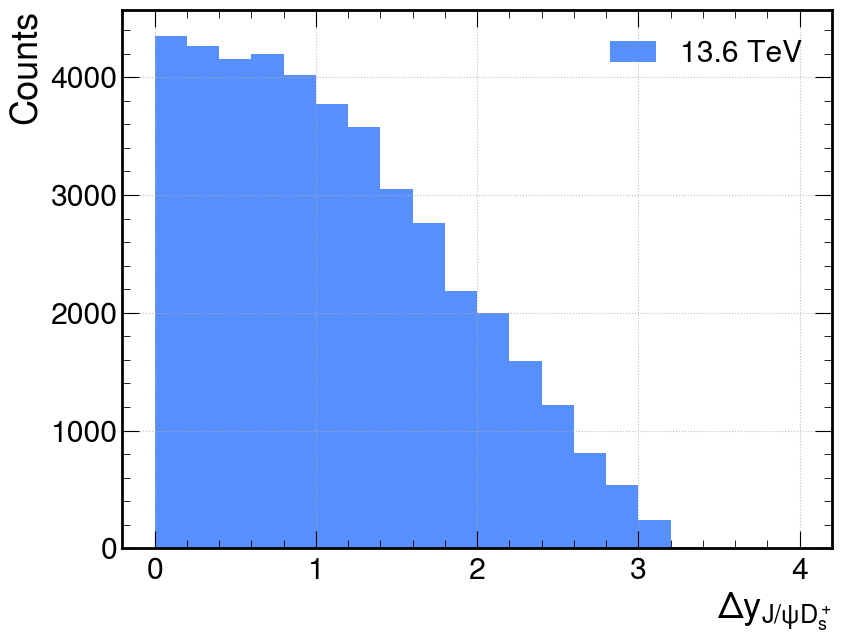

Saved: single_plots/jpsidsplus_delta_phi_13TeV.png


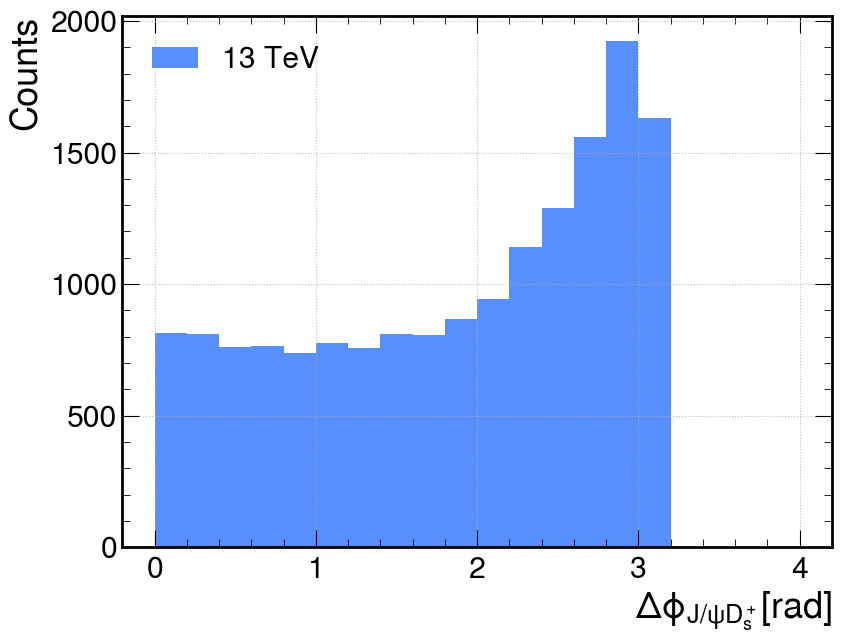

Saved: single_plots/jpsidsplus_delta_phi_13.6TeV.png


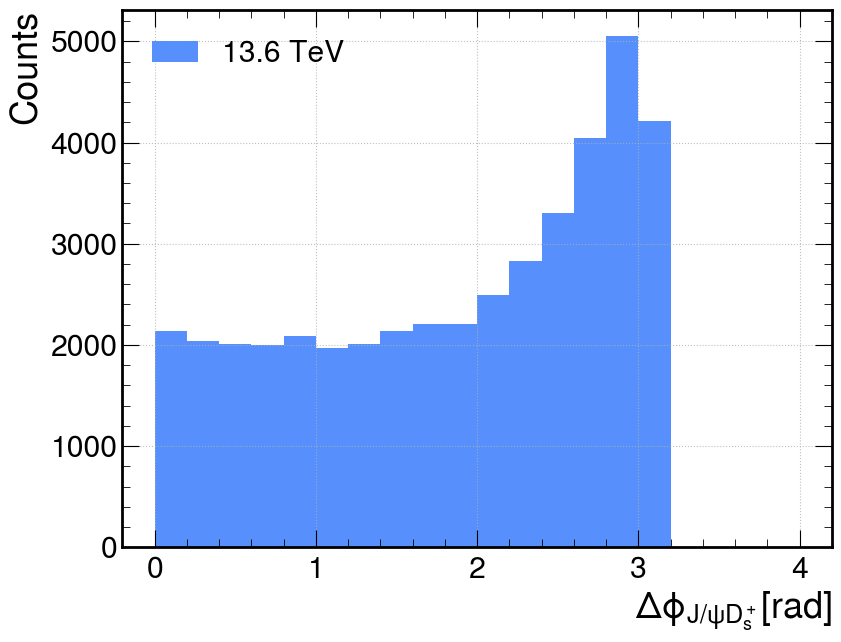

In [5]:
# JpsiDsplus

plot_distribution(channel='jpsidsplus', parameter='invariant_mass', energy='13')
plot_distribution(channel='jpsidsplus', parameter='invariant_mass', energy='13p6')

plot_distribution(channel='jpsidsplus', parameter='delta_rapidity', energy='13')
plot_distribution(channel='jpsidsplus', parameter='delta_rapidity', energy='13p6')

plot_distribution(channel='jpsidsplus', parameter='delta_phi', energy='13')
plot_distribution(channel='jpsidsplus', parameter='delta_phi', energy='13p6')

In [6]:
def plot_comparison_same_particle(channel='jpsidzero', parameter='invariant_mass'):

    plt.style.use(mplhep.style.CMS)
    try:
        file_path_13tev = f"control_plots_{channel}_13TeV.root"
        file_path_13p6tev = f"control_plots_{channel}_13p6TeV.root"
        tree13tev = uproot.open(file_path_13tev)["GenTree"]
        tree13p6tev = uproot.open(file_path_13p6tev)["GenTree"]
    except:
        print("Check if the root file is available. Channel must be: jpsidzero, jpsidplus or jpsidsplus. Energy must be: 13 or 13p6")

    # Extract the variable from the tree
    if channel == 'jpsidzero':
        gen_par_13 = tree13tev[f"genJpsidzero_{parameter}"].array(library="np")
        gen_par_13p6 = tree13p6tev[f"genJpsidzero_{parameter}"].array(library="np")
    elif channel == 'jpsidplus':
        gen_par_13 = tree13tev[f"genJpsidplus_{parameter}"].array(library="np")
        gen_par_13p6 = tree13p6tev[f"genJpsidplus_{parameter}"].array(library="np")
    elif channel == 'jpsidsplus':
        gen_par_13 = tree13tev[f"genJpsidsplus_{parameter}"].array(library="np")
        gen_par_13p6 = tree13p6tev[f"genJpsidsplus_{parameter}"].array(library="np")
    
    gen_par_flat_13 = np.concatenate([arr for arr in gen_par_13 if len(arr) > 0])
    gen_par_flat_13p6 = np.concatenate([arr for arr in gen_par_13p6 if len(arr) > 0])
    
    # Plot with mplhep and matplotlib
    fig, ax = plt.subplots(figsize=(9, 7))

    if parameter == 'invariant_mass':
        xlab = r"$M_{J/\psi Dmeson} [GeV/c^2]$"
        # Create histogram with hist
        hist_13 = hist.Hist.new.Reg(20, 0, 100, name="mass", label="Invariant Mass [GeV/c2]").Double()
        hist_13.fill(mass=gen_par_flat_13)
        hist_13p6 = hist.Hist.new.Reg(20, 0, 100, name="mass", label="Invariant Mass [GeV/c2]").Double()
        hist_13p6.fill(mass=gen_par_flat_13p6)
    elif parameter == 'delta_rapidity':
        xlab = r"$\Delta y_{J/\psi Dmeson}$"
        # Create histogram with hist
        hist_13 = hist.Hist.new.Reg(20, 0, 4, name="deltarap", label="Invariant Mass [GeV/c2]").Double()
        hist_13.fill(deltarap=gen_par_flat_13)
        hist_13p6 = hist.Hist.new.Reg(20, 0, 4, name="deltarap", label="Invariant Mass [GeV/c2]").Double()
        hist_13p6.fill(deltarap=gen_par_flat_13p6)
    elif parameter == 'delta_phi':
        xlab = r"$\Delta \phi_{J/\psi Dmeson} [rad]$"
        # Create histogram with hist
        hist_13 = hist.Hist.new.Reg(20, 0, 4, name="deltaphi", label="Invariant Mass [GeV/c2]").Double()
        hist_13.fill(deltaphi=gen_par_flat_13)
        hist_13p6 = hist.Hist.new.Reg(20, 0, 4, name="deltaphi", label="Invariant Mass [GeV/c2]").Double()
        hist_13p6.fill(deltaphi=gen_par_flat_13p6)

    if channel == 'jpsidzero':
        plt.xlabel(xlab.replace("meson", '^0'))
    elif channel == 'jpsidplus':
        plt.xlabel(xlab.replace("meson", '^+'))
    elif channel == 'jpsidsplus':
        plt.xlabel(xlab.replace("meson", '^+_s'))

    # Plot for 13 TeV and 13.6 TeV
    mplhep.histplot(hist_13, histtype="step", density=True, label=r"$\sqrt{s}$=13 TeV", ax=ax)
    mplhep.histplot(hist_13p6, histtype="step", density=True, label=r"$\sqrt{s}$=13.6 TeV", ax=ax)
    plt.legend()
        
    #plt.ylabel("Counts")   
    plt.grid(True)
    plt.tight_layout()
    os.makedirs('comparison_plots_same_particle', exist_ok=True)
    plt.savefig(os.path.join('comparison_plots_same_particle', f'comparison_{channel}_{parameter}.png'))
    plt.show()


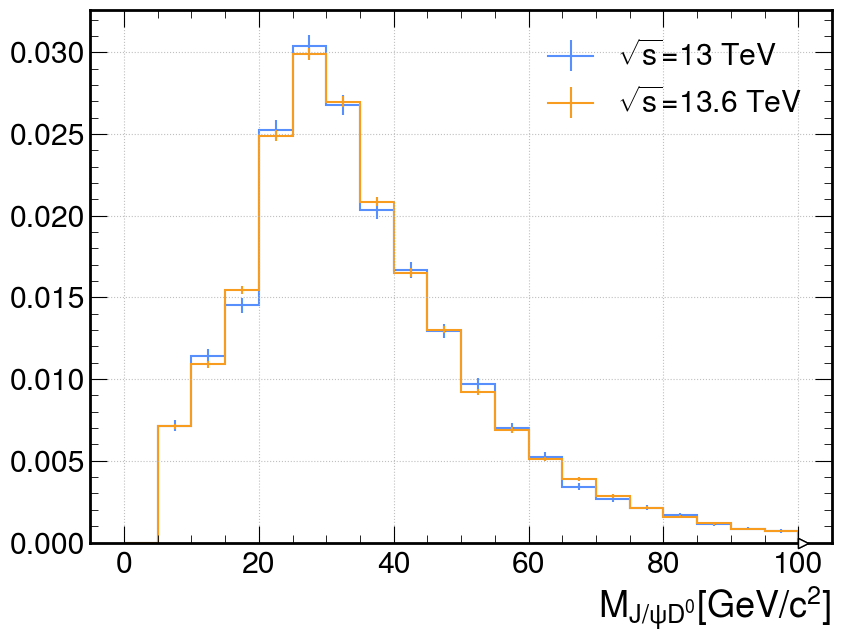

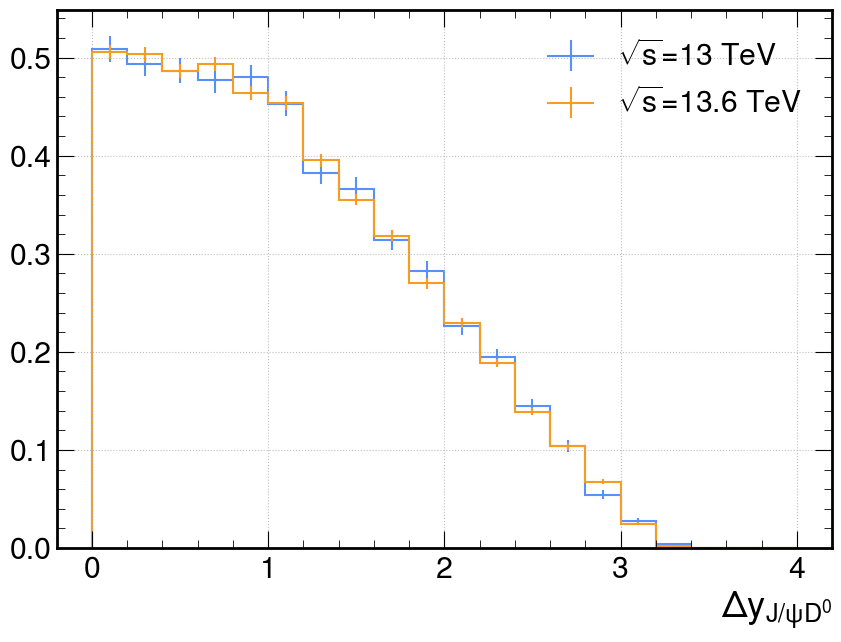

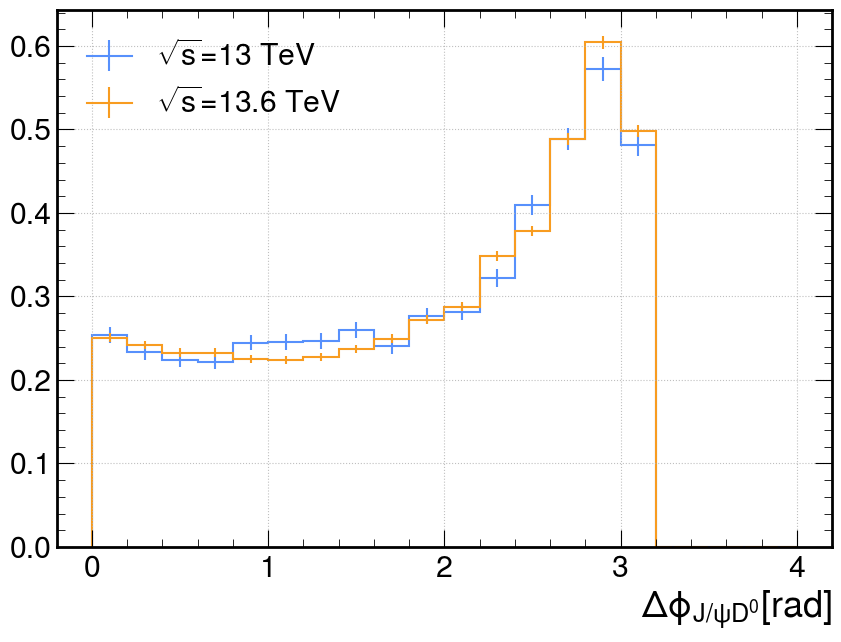

In [7]:
# JpsiDzero

plot_comparison_same_particle(channel='jpsidzero', parameter='invariant_mass')
plot_comparison_same_particle(channel='jpsidzero', parameter='delta_rapidity')
plot_comparison_same_particle(channel='jpsidzero', parameter='delta_phi')

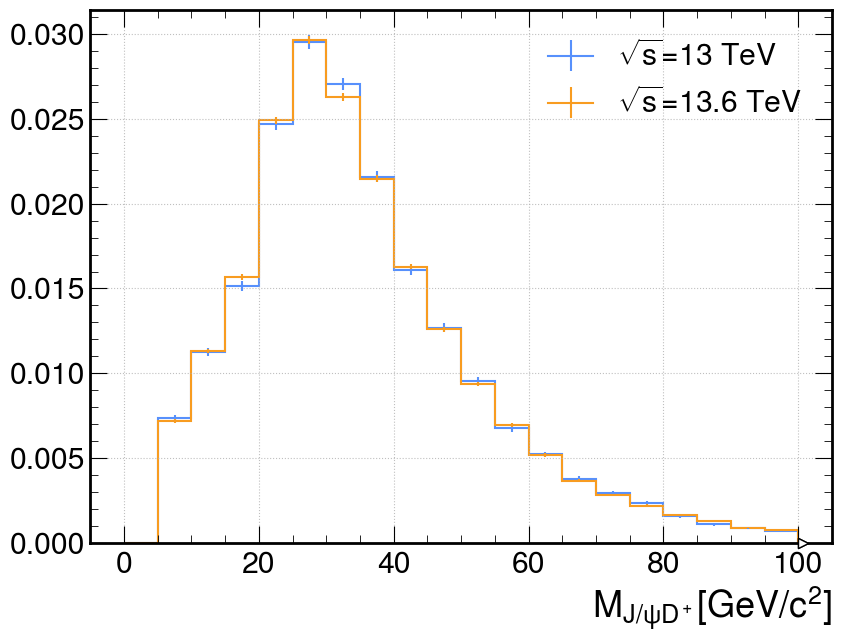

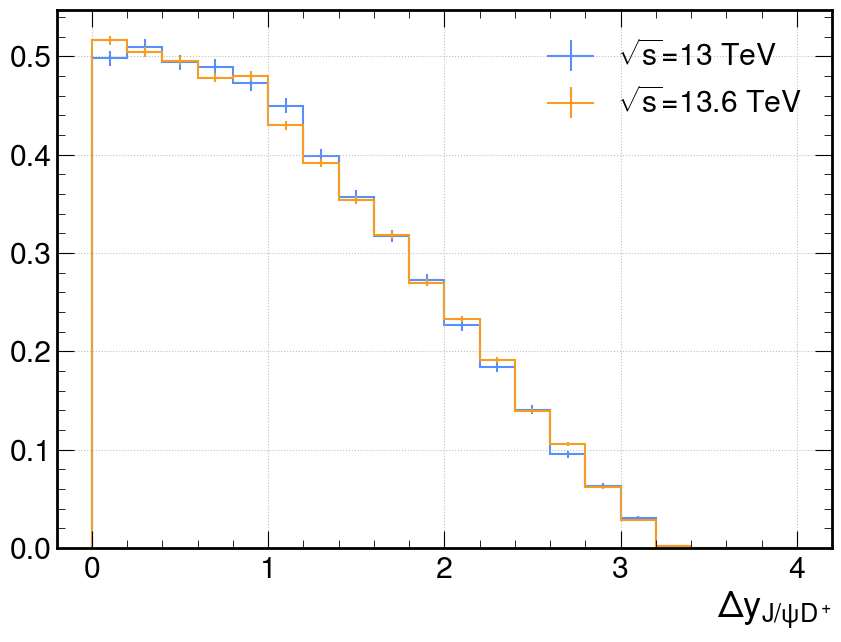

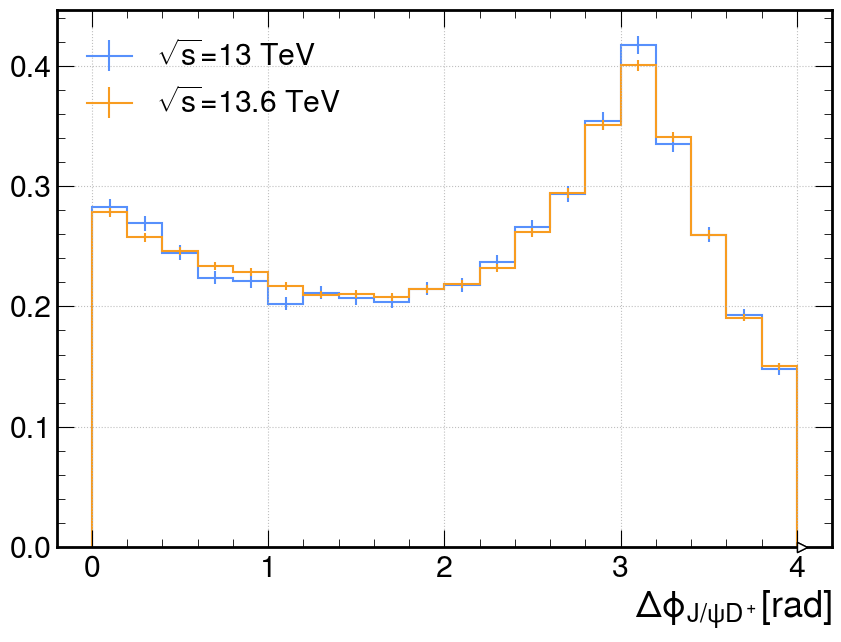

In [8]:
# JpsiDplus

plot_comparison_same_particle(channel='jpsidplus', parameter='invariant_mass')
plot_comparison_same_particle(channel='jpsidplus', parameter='delta_rapidity')
plot_comparison_same_particle(channel='jpsidplus', parameter='delta_phi')

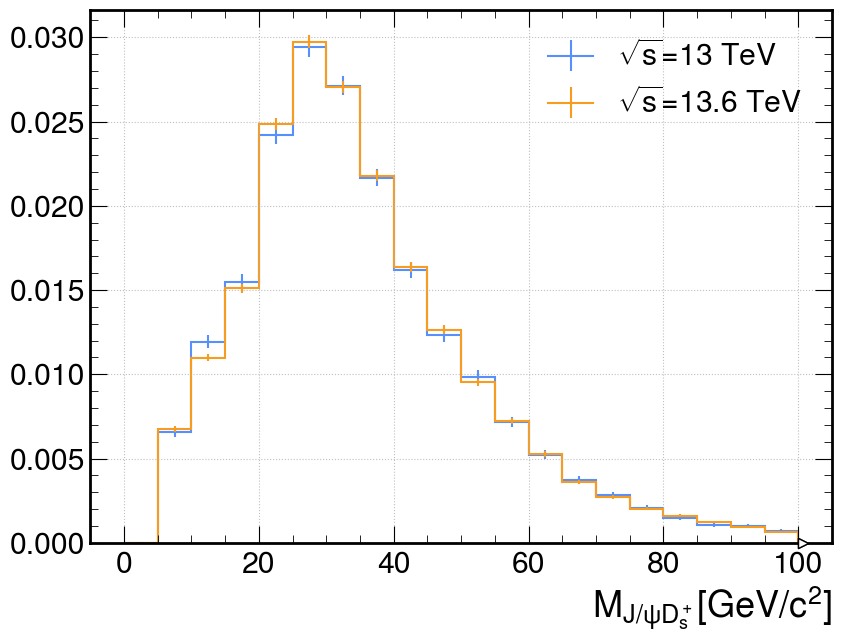

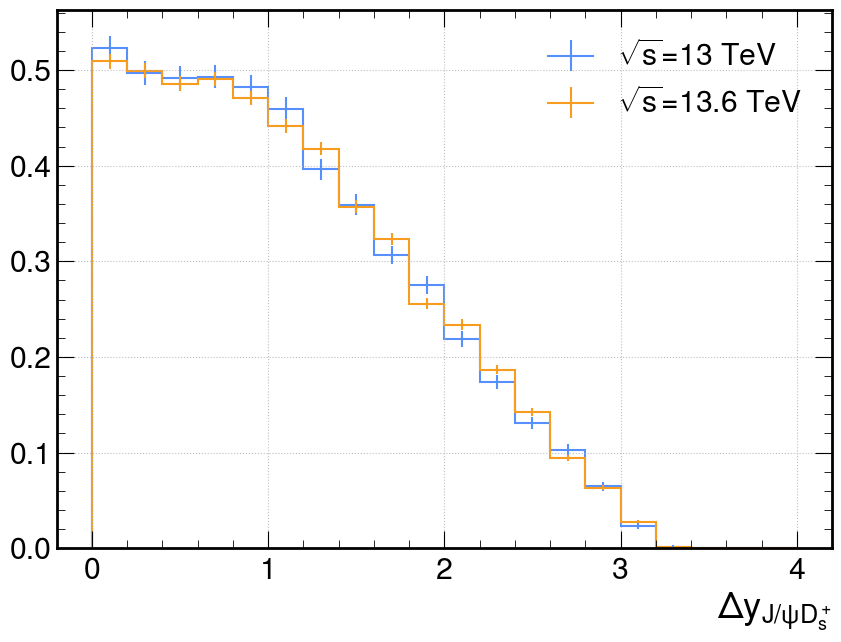

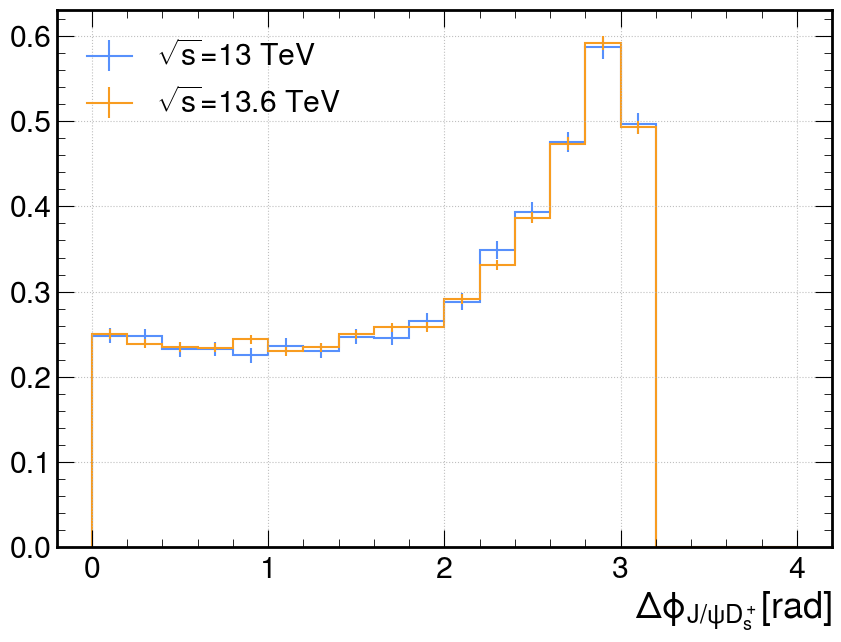

In [9]:
# JpsiDplus

plot_comparison_same_particle(channel='jpsidsplus', parameter='invariant_mass')
plot_comparison_same_particle(channel='jpsidsplus', parameter='delta_rapidity')
plot_comparison_same_particle(channel='jpsidsplus', parameter='delta_phi')

In [10]:
def all_same_part(channel):

    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    image_files= [f'comparison_plots_same_particle/comparison_{channel}_invariant_mass.png', 
                  f'comparison_plots_same_particle/comparison_{channel}_delta_rapidity.png', 
                  f'comparison_plots_same_particle/comparison_{channel}_delta_phi.png']
    
    # Titles for each subplot (optional)
    titles = [
        r'Invariant Mass comparison',
        r'$\Delta$y comparison',
        r'$\Delta\Phi$ comparison'
    ]
    
    # Read and display each image
    for i, (ax, img_file, title) in enumerate(zip(axes, image_files, titles)):
        img = mpimg.imread(img_file)
        ax.imshow(img)
        ax.set_title(title, fontsize=12)
        ax.axis('off')  # Hide axes ticks and labels
    
    # Adjust layout and display
    plt.tight_layout()
    # Save the combined figure (optional)
    plt.savefig(f'comparison_plots_same_particle/combined_comparison_plots_{channel}.png', dpi=300, bbox_inches='tight')
    plt.show()

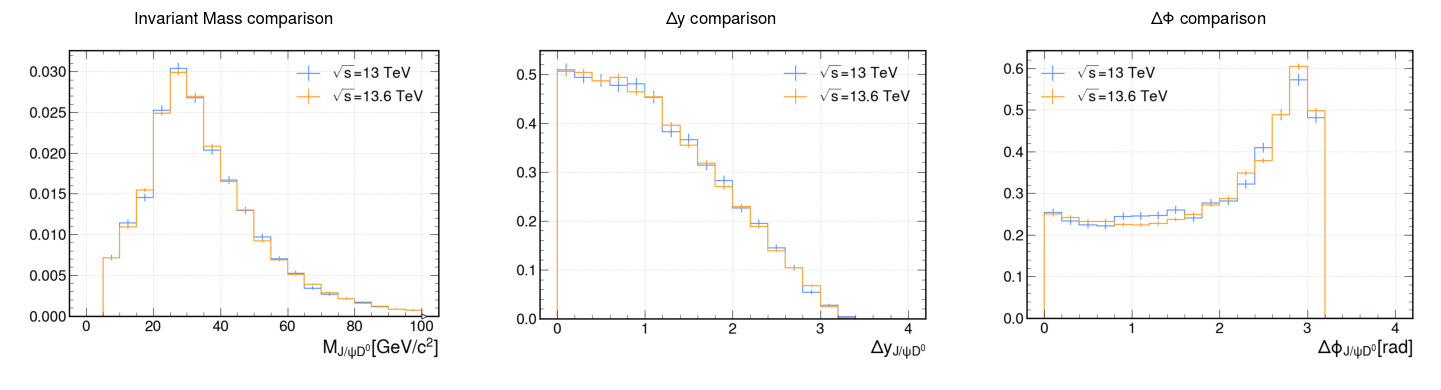

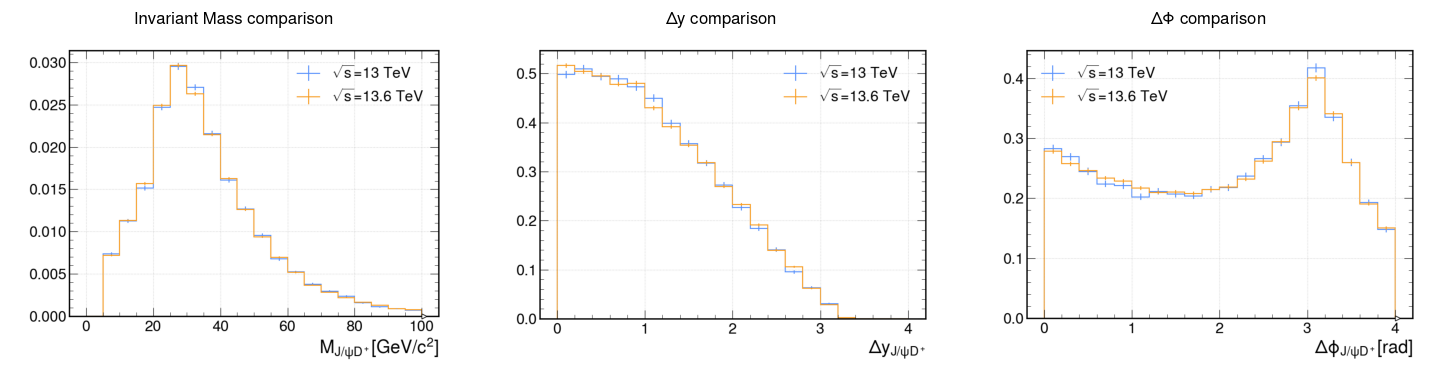

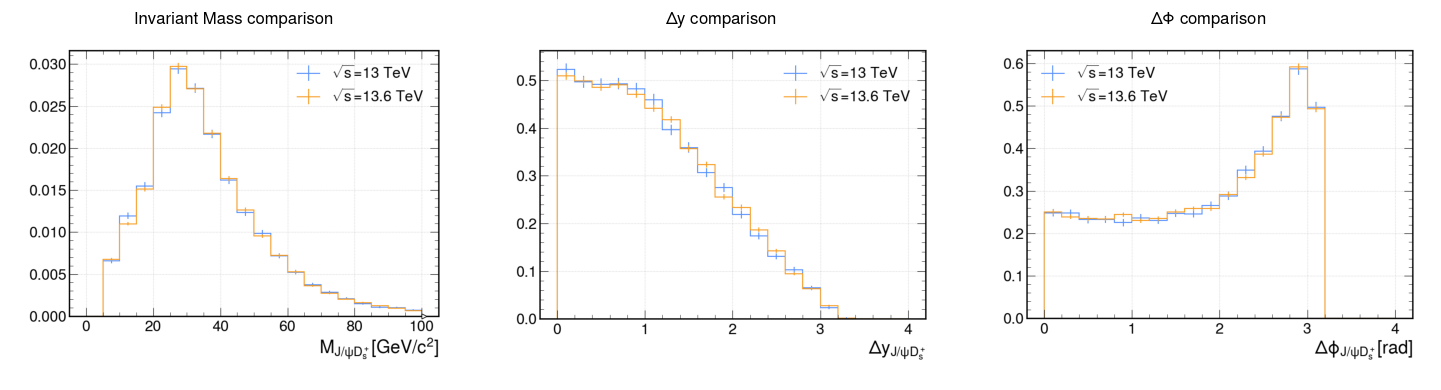

In [11]:
all_same_part(channel='jpsidzero')
all_same_part(channel='jpsidplus')
all_same_part(channel='jpsidsplus')

In [12]:
def plot_comparison_different_particle(parameter='invariant_mass', energy='13'):

    plt.style.use(mplhep.style.CMS)
    try:
        file_path_jpsidzero = f"control_plots_jpsidzero_{energy}TeV.root"
        file_path_jpsidplus = f"control_plots_jpsidplus_{energy}TeV.root"
        file_path_jpsidsplus = f"control_plots_jpsidsplus_{energy}TeV.root"
        
        tree_jpsidzero = uproot.open(file_path_jpsidzero)["GenTree"]
        tree_jpsidplus = uproot.open(file_path_jpsidplus)["GenTree"]
        tree_jpsidsplus = uproot.open(file_path_jpsidsplus)["GenTree"]
    except:
        print("Check if the root file is available. Channel must be: jpsidzero, jpsidplus or jpsidsplus. Energy must be: 13 or 13p6")

    gen_par_jpsidzero = tree_jpsidzero[f"genJpsidzero_{parameter}"].array(library="np")
    gen_par_jpsidplus = tree_jpsidplus[f"genJpsidplus_{parameter}"].array(library="np")
    gen_par_jpsidsplus = tree_jpsidsplus[f"genJpsidsplus_{parameter}"].array(library="np")

    gen_par_flat_jpsidzero = np.concatenate([arr for arr in gen_par_jpsidzero if len(arr) > 0])
    gen_par_flat_jpsidplus = np.concatenate([arr for arr in gen_par_jpsidplus if len(arr) > 0])
    gen_par_flat_jpsidsplus = np.concatenate([arr for arr in gen_par_jpsidsplus if len(arr) > 0])
    
    # Plot with mplhep and matplotlib
    fig, ax = plt.subplots(figsize=(9, 7))

    if parameter == 'invariant_mass':
        xlab = r"$M_{J/\psi Dmeson} [GeV/c^2]$"
        # Create histogram with hist
        hist_jpsidzero = hist.Hist.new.Reg(20, 0, 100, name="mass", label=r"Invariant Mass $[GeV/c^2]$").Double()
        hist_jpsidzero.fill(mass=gen_par_flat_jpsidzero)

        hist_jpsidplus = hist.Hist.new.Reg(20, 0, 100, name="mass", label=r"Invariant Mass $[GeV/c^2]$").Double()
        hist_jpsidplus.fill(mass=gen_par_flat_jpsidplus)

        hist_jpsidsplus = hist.Hist.new.Reg(20, 0, 100, name="mass", label=r"Invariant Mass $[GeV/c^2]$").Double()
        hist_jpsidsplus.fill(mass=gen_par_flat_jpsidsplus)
    elif parameter == 'delta_rapidity':
        xlab = r"$\Delta y_{J/\psi Dmeson}$"
        # Create histogram with hist
        hist_jpsidzero = hist.Hist.new.Reg(20, 0, 4, name="deltarap", label=r"$\Delta y$").Double()
        hist_jpsidzero.fill(deltarap=gen_par_flat_jpsidzero)

        hist_jpsidplus = hist.Hist.new.Reg(20, 0, 4, name="deltarap", label=r"$\Delta y$").Double()
        hist_jpsidplus.fill(deltarap=gen_par_flat_jpsidplus)

        hist_jpsidsplus = hist.Hist.new.Reg(20, 0, 4, name="deltarap", label=r"$\Delta y$").Double()
        hist_jpsidsplus.fill(deltarap=gen_par_flat_jpsidsplus)
    elif parameter == 'delta_phi':
        xlab = r"$\Delta \phi_{J/\psi Dmeson} [rad]$"
        # Create histogram with hist
        hist_jpsidzero = hist.Hist.new.Reg(20, 0, 4, name="deltaphi", label=r"$\Delta \Phi$").Double()
        hist_jpsidzero.fill(deltaphi=gen_par_flat_jpsidzero)
        
        hist_jpsidplus = hist.Hist.new.Reg(20, 0, 4, name="deltaphi", label=r"$\Delta \Phi$").Double()
        hist_jpsidplus.fill(deltaphi=gen_par_flat_jpsidplus)
        
        hist_jpsidsplus = hist.Hist.new.Reg(20, 0, 4, name="deltaphi", label=r"$\Delta \Phi$").Double()
        hist_jpsidsplus.fill(deltaphi=gen_par_flat_jpsidsplus)

    '''if channel == 'jpsidzero':
        plt.xlabel(xlab.replace("meson", '^0'))
    elif channel == 'jpsidplus':
        plt.xlabel(xlab.replace("meson", '^+'))
    elif channel == 'jpsidsplus':
        plt.xlabel(xlab.replace("meson", '^+_s'))'''

    mplhep.histplot(hist_jpsidzero, histtype="step", density=True, label=r"$J/\psi D^0$", ax=ax)
    mplhep.histplot(hist_jpsidplus, histtype="step", density=True, label=r"$J/\psi D^+$", ax=ax)
    mplhep.histplot(hist_jpsidsplus, histtype="step", density=True, label=r"$J/\psi D^+_s$", ax=ax)

    if energy == "13p6":
        energy_plot = "13.6"
    elif energy == "13":
        energy_plot = "13" 

    text_ch = plt.text(0.80, 0.60, f"{energy_plot} TeV",
                      fontsize=22,
                      fontweight='bold',
                      horizontalalignment='left',
                      verticalalignment='bottom',
                      transform=ax.transAxes
                     )
       
    #plt.ylabel("Counts")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    os.makedirs('comparison_different_particle', exist_ok=True)
    plt.savefig(os.path.join('comparison_different_particle', f'comparison_jpsidmeson_{parameter}_{energy}.png'))
    plt.show()
    


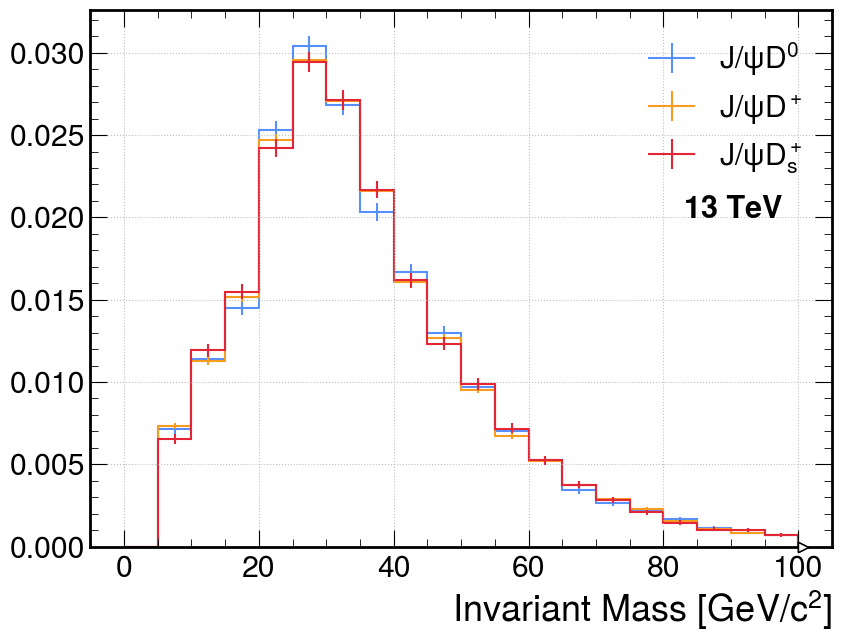

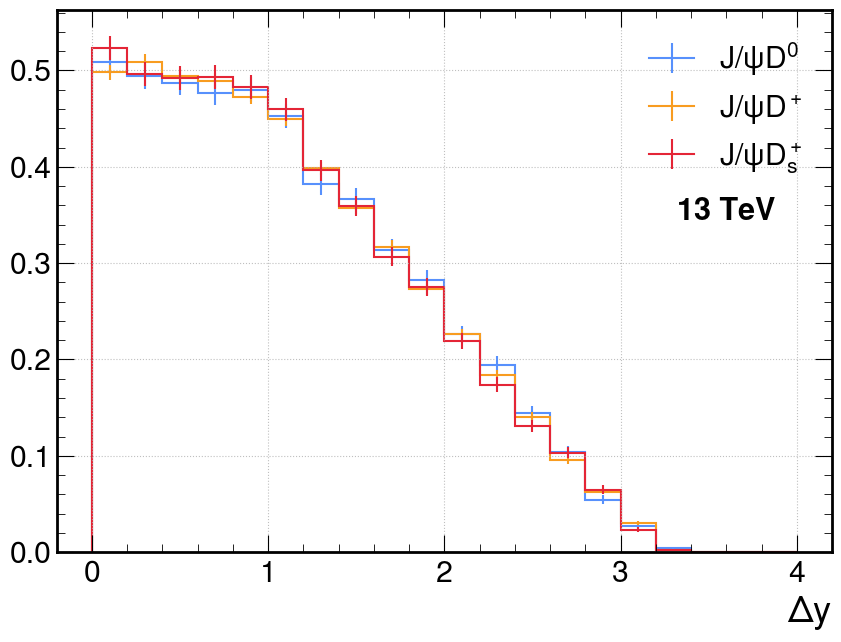

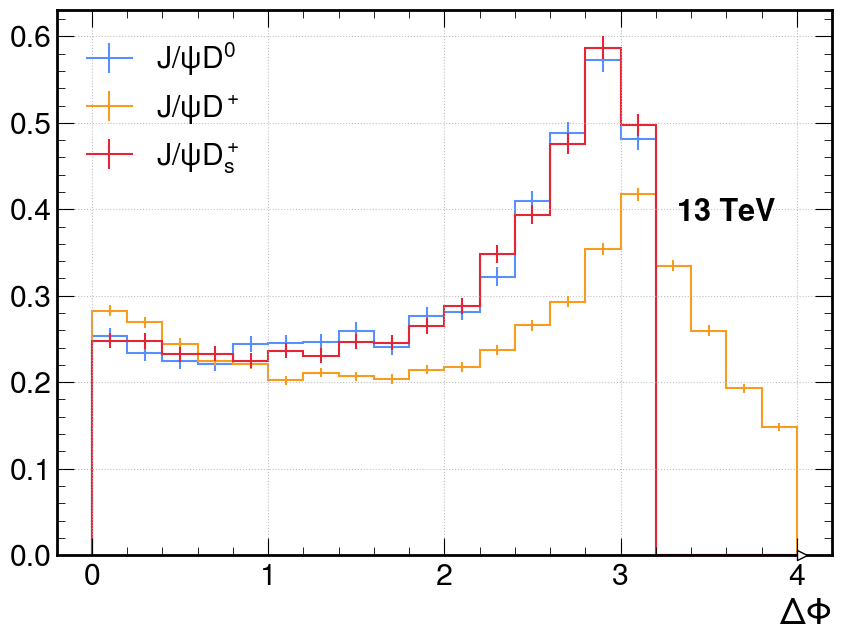

In [13]:
# Comparison all (13 TeV)

plot_comparison_different_particle(parameter='invariant_mass', energy='13')
plot_comparison_different_particle(parameter='delta_rapidity', energy='13')
plot_comparison_different_particle(parameter='delta_phi', energy='13')

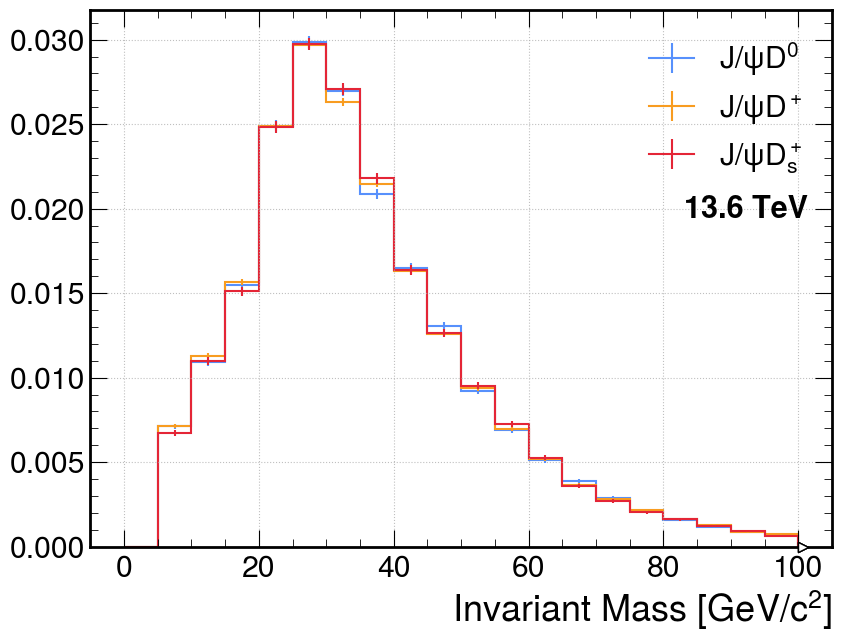

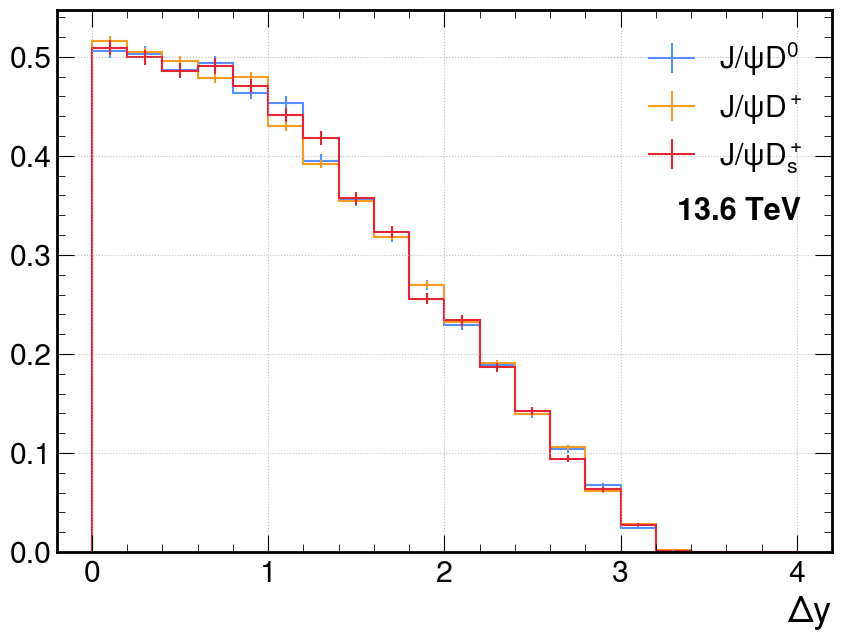

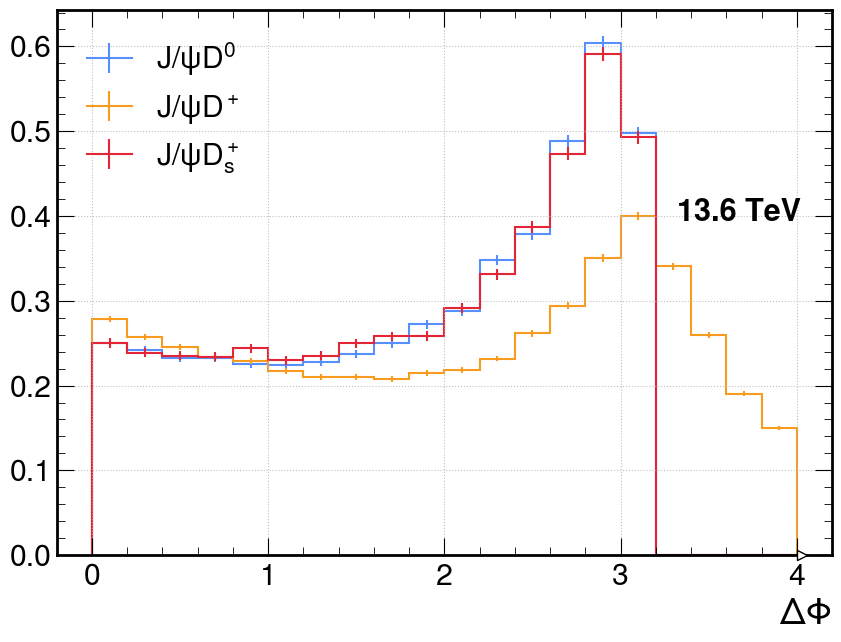

In [14]:
# Comparison all (13.6 TeV)

plot_comparison_different_particle(parameter='invariant_mass', energy='13p6')
plot_comparison_different_particle(parameter='delta_rapidity', energy='13p6')
plot_comparison_different_particle(parameter='delta_phi', energy='13p6')

In [15]:
def all_different_part(energy='13'):

    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    image_files= [f'comparison_different_particle/comparison_jpsidmeson_invariant_mass_{energy}.png', #comparison_jpsidmeson_delta_phi_13p6.png
                  f'comparison_different_particle/comparison_jpsidmeson_delta_rapidity_{energy}.png', 
                  f'comparison_different_particle/comparison_jpsidmeson_delta_phi_{energy}.png']
    
    # Titles for each subplot (optional)
    titles = [
        r'Invariant Mass comparison',
        r'$\Delta$y comparison',
        r'$\Delta\Phi$ comparison'
    ]

    try:
    # Read and display each image
        for i, (ax, img_file, title) in enumerate(zip(axes, image_files, titles)):
            img = mpimg.imread(img_file)
            ax.imshow(img)
            ax.set_title(title, fontsize=12)
            ax.axis('off')  # Hide axes ticks and labels

        # Adjust layout and display
        plt.tight_layout()
        # Save the combined figure (optional)
        plt.savefig(f'comparison_different_particle/combined_comparison_plots_jpsidmeson_{energy}.png', dpi=300, bbox_inches='tight')
        plt.show()
    except FileNotFoundError:
        print("Comparison plots not found! Run the method plot_comparison_different_particle to get them!")

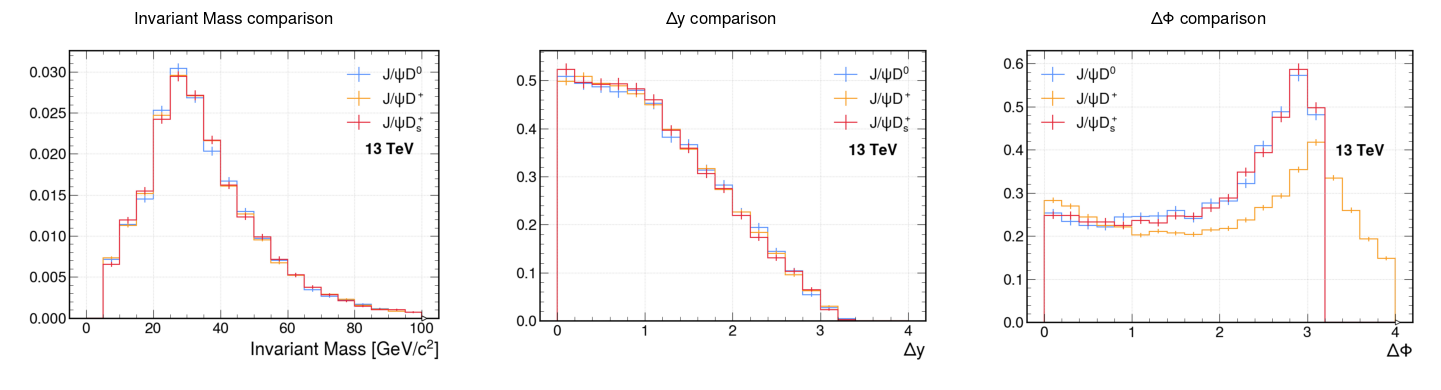

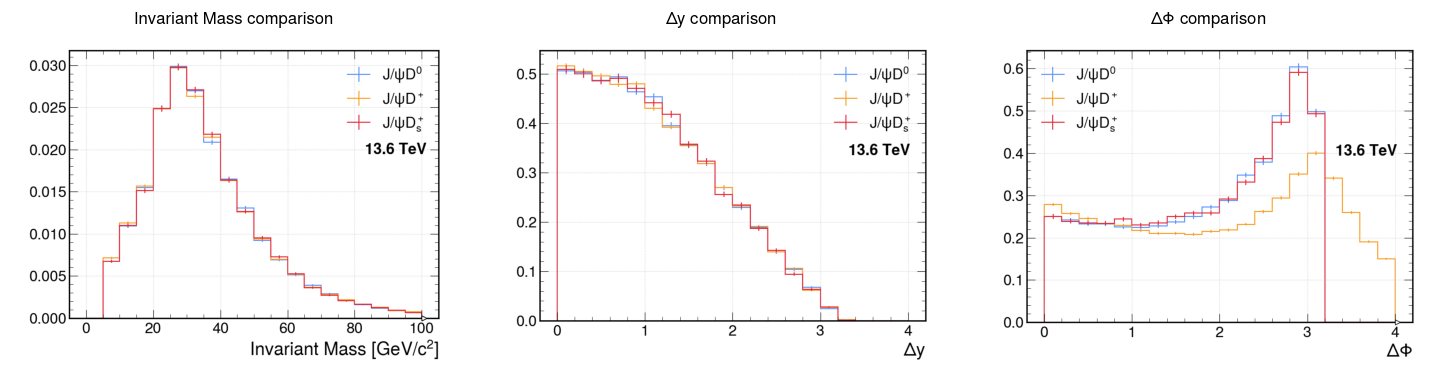

In [16]:
all_different_part(energy='13')
all_different_part(energy='13p6')